## Sentiment Analysis with Tweepy

### Set up environment

In [2]:
pip install punkt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt


In [3]:
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

import numpy as npA
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]  

### Twitter Authentication

In [4]:
bearer = "AAAAAAAAAAAAAAAAAAAAAPeugQEAAAAAVi0ef3ZKfeQu84IONaURTQST6ss%3DlyN7hG9xj5kiNwDy4los2q09WKK1NqhhX1r1qcJ7ryOctfAyZ4"
consumer_key = "t3ahC4CLYCCZ3n3CDGBFPJMIY"
consumer_secret = "FPEILBDdq6TRyOCZ3o85SWm2M9LTwcce8DLI6R76WtPIN0VWjp" 
access_token = "1563137562654699521-Xpo0ndri5XEy4ero9XC6Ucmx6u9hVj"
access_token_secret = "Jbm8xURM17OYshFhHRbmm2ViuYgCaif52y8cJG8UNkODq"

In [5]:
## initialize tweepy
api = tweepy.Client(bearer, consumer_key, consumer_secret, access_token, access_token_secret)
api.get_me()

Response(data=<User id=1563137562654699521 name=Mrigendra kumar username=bablu_ai23>, includes={}, errors=[], meta={})

In [6]:
#Put your Bearer Token in the parenthesis below
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAPeugQEAAAAAVi0ef3ZKfeQu84IONaURTQST6ss%3DlyN7hG9xj5kiNwDy4los2q09WKK1NqhhX1r1qcJ7ryOctfAyZ4')

### Get recent public tweets on a keyword

In [7]:
# Pull tweets from twitter

query = '#recession -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=100,                       # How many tweets per page
    limit=10                               # How many pages to retrieve
)
# Get tweets that contain the hashtag #TypeKeywordHere
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english

tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

European economic activity fell once again in September, a closely-watched survey showed Friday, heightening expectations of an impending #recession. #EU https://t.co/bqu3dnIIjt
23 September was Black Friday, if you r one of investors among mentioned in news below, 👇you need training and education. 

Telegram Link…..https://t.co/SQp7Ks0v2I

#portfolio #investment #MutualFundsSahiHai #gold #silver #crudeoil #recession #StockMarket #stockmarketcrash https://t.co/2BzSKZ7esW
Recession don't knock the doors and say can I come in so don't worry this time it is just a fall.

#recession #stocks #invest
From  Fed to Europe's currency crisis what's behind this financial market selloff #stocks #markets #investing #trading #Dow #Nasdaq $SPX #WallStreet #ratehikes #Fed #inflation #rates #economic #selloff #recession #fear #forex #Europe #OTCMarkets  Checkout https://t.co/WocqJ0APhG https://t.co/Xtt7LeGhsS
Global #stocks fall for a 2nd straight week as CBs raises rates - #DowJones drops nearly 500 p

In [8]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,European economic activity fell once again in ...
1,"23 September was Black Friday, if you r one of..."
2,Recession don't knock the doors and say can I ...
3,From Fed to Europe's currency crisis what's b...
4,Global #stocks fall for a 2nd straight week as...


In [9]:
tweet_list_df.shape

(983, 1)

### Data preprocessing

In [10]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [11]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [12]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,European economic activity fell once again in ...,european economic activity fell once again in ...
1,"23 September was Black Friday, if you r one of...",23 september was black friday if you one of in...
2,Recession don't knock the doors and say can I ...,recession don knock the doors and say can come...
3,From Fed to Europe's currency crisis what's b...,from fed to europe currency crisis what behind...
4,Global #stocks fall for a 2nd straight week as...,global stocks fall for 2nd straight week as cb...


In [13]:
############## TOKENIZING ##################
from nltk.tokenize import word_tokenize
tokenized_tweet = tweet_list_df['cleaned'].apply(word_tokenize)
tweet_list_df['tokenized'] = tokenized_tweet
tweet_list_df.head(5)

,text,cleaned,tokenized
0,European economic activity fell once again in ...,european economic activity fell once again in ...,"[european, economic, activity, fell, once, aga..."
1,"23 September was Black Friday, if you r one of...",23 september was black friday if you one of in...,"[23, september, was, black, friday, if, you, o..."
2,Recession don't knock the doors and say can I ...,recession don knock the doors and say can come...,"[recession, don, knock, the, doors, and, say, ..."
3,From Fed to Europe's currency crisis what's b...,from fed to europe currency crisis what behind...,"[from, fed, to, europe, currency, crisis, what..."
4,Global #stocks fall for a 2nd straight week as...,global stocks fall for 2nd straight week as cb...,"[global, stocks, fall, for, 2nd, straight, wee..."


In [14]:
############## STOPWORDS REMOVAL ##################
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
tweet_list_df['stopwords_removal'] = tweet_list_df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal
0,European economic activity fell once again in ...,european economic activity fell once again in ...,"[european, economic, activity, fell, once, aga...","[european, economic, activity, fell, september..."
1,"23 September was Black Friday, if you r one of...",23 september was black friday if you one of in...,"[23, september, was, black, friday, if, you, o...","[23, september, black, friday, one, investors,..."
2,Recession don't knock the doors and say can I ...,recession don knock the doors and say can come...,"[recession, don, knock, the, doors, and, say, ...","[recession, knock, doors, say, come, worry, ti..."
3,From Fed to Europe's currency crisis what's b...,from fed to europe currency crisis what behind...,"[from, fed, to, europe, currency, crisis, what...","[fed, europe, currency, crisis, behind, financ..."
4,Global #stocks fall for a 2nd straight week as...,global stocks fall for 2nd straight week as cb...,"[global, stocks, fall, for, 2nd, straight, wee...","[global, stocks, fall, 2nd, straight, week, cb..."


In [15]:
############## STEMMING ##################
from nltk.stem import PorterStemmer
def porter_stemmer(text):
    """
        Stem words in list of tokenized words with PorterStemmer
    """
    stemmer = nltk.PorterStemmer()
    stems = [stemmer.stem(i) for i in text]
    return stems

tweet_list_df['stemming'] = tweet_list_df['stopwords_removal'].apply(lambda x: porter_stemmer(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming
0,European economic activity fell once again in ...,european economic activity fell once again in ...,"[european, economic, activity, fell, once, aga...","[european, economic, activity, fell, september...","[european, econom, activ, fell, septemb, close..."
1,"23 September was Black Friday, if you r one of...",23 september was black friday if you one of in...,"[23, september, was, black, friday, if, you, o...","[23, september, black, friday, one, investors,...","[23, septemb, black, friday, one, investor, am..."
2,Recession don't knock the doors and say can I ...,recession don knock the doors and say can come...,"[recession, don, knock, the, doors, and, say, ...","[recession, knock, doors, say, come, worry, ti...","[recess, knock, door, say, come, worri, time, ..."
3,From Fed to Europe's currency crisis what's b...,from fed to europe currency crisis what behind...,"[from, fed, to, europe, currency, crisis, what...","[fed, europe, currency, crisis, behind, financ...","[fed, europ, currenc, crisi, behind, financi, ..."
4,Global #stocks fall for a 2nd straight week as...,global stocks fall for 2nd straight week as cb...,"[global, stocks, fall, for, 2nd, straight, wee...","[global, stocks, fall, 2nd, straight, week, cb...","[global, stock, fall, 2nd, straight, week, cb,..."


In [16]:
############## LEMATIZING ##################
from nltk.stem import WordNetLemmatizer

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
tweet_list_df['lemmatized'] = tweet_list_df['stopwords_removal'].apply(lambda x: lemmatizer_on_text(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized
0,European economic activity fell once again in ...,european economic activity fell once again in ...,"[european, economic, activity, fell, once, aga...","[european, economic, activity, fell, september...","[european, econom, activ, fell, septemb, close...","[european, economic, activity, fell, september..."
1,"23 September was Black Friday, if you r one of...",23 september was black friday if you one of in...,"[23, september, was, black, friday, if, you, o...","[23, september, black, friday, one, investors,...","[23, septemb, black, friday, one, investor, am...","[23, september, black, friday, one, investors,..."
2,Recession don't knock the doors and say can I ...,recession don knock the doors and say can come...,"[recession, don, knock, the, doors, and, say, ...","[recession, knock, doors, say, come, worry, ti...","[recess, knock, door, say, come, worri, time, ...","[recession, knock, doors, say, come, worry, ti..."
3,From Fed to Europe's currency crisis what's b...,from fed to europe currency crisis what behind...,"[from, fed, to, europe, currency, crisis, what...","[fed, europe, currency, crisis, behind, financ...","[fed, europ, currenc, crisi, behind, financi, ...","[fed, europe, currency, crisis, behind, financ..."
4,Global #stocks fall for a 2nd straight week as...,global stocks fall for 2nd straight week as cb...,"[global, stocks, fall, for, 2nd, straight, wee...","[global, stocks, fall, 2nd, straight, week, cb...","[global, stock, fall, 2nd, straight, week, cb,...","[global, stocks, fall, 2nd, straight, week, cb..."


In [17]:
############## TAGGING ##################
tweet_list_df['tagging'] = tweet_list_df['stopwords_removal'].apply(lambda x: nltk.pos_tag(x))
tweet_list_df.head()

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized,tagging
0,European economic activity fell once again in ...,european economic activity fell once again in ...,"[european, economic, activity, fell, once, aga...","[european, economic, activity, fell, september...","[european, econom, activ, fell, septemb, close...","[european, economic, activity, fell, september...","[(european, JJ), (economic, JJ), (activity, NN..."
1,"23 September was Black Friday, if you r one of...",23 september was black friday if you one of in...,"[23, september, was, black, friday, if, you, o...","[23, september, black, friday, one, investors,...","[23, septemb, black, friday, one, investor, am...","[23, september, black, friday, one, investors,...","[(23, CD), (september, JJ), (black, JJ), (frid..."
2,Recession don't knock the doors and say can I ...,recession don knock the doors and say can come...,"[recession, don, knock, the, doors, and, say, ...","[recession, knock, doors, say, come, worry, ti...","[recess, knock, door, say, come, worri, time, ...","[recession, knock, doors, say, come, worry, ti...","[(recession, NN), (knock, NN), (doors, NNS), (..."
3,From Fed to Europe's currency crisis what's b...,from fed to europe currency crisis what behind...,"[from, fed, to, europe, currency, crisis, what...","[fed, europe, currency, crisis, behind, financ...","[fed, europ, currenc, crisi, behind, financi, ...","[fed, europe, currency, crisis, behind, financ...","[(fed, VBN), (europe, JJ), (currency, NN), (cr..."
4,Global #stocks fall for a 2nd straight week as...,global stocks fall for 2nd straight week as cb...,"[global, stocks, fall, for, 2nd, straight, wee...","[global, stocks, fall, 2nd, straight, week, cb...","[global, stock, fall, 2nd, straight, week, cb,...","[global, stocks, fall, 2nd, straight, week, cb...","[(global, JJ), (stocks, NNS), (fall, VBP), (2n..."


### Generate Sentiment Labels

In [18]:
#Calculating Negative, Positive, Neutral and Compound values

tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

tweet_list_df.head(5)

,text,cleaned,tokenized,stopwords_removal,stemming,lemmatized,tagging,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,European economic activity fell once again in ...,european economic activity fell once again in ...,"[european, economic, activity, fell, once, aga...","[european, economic, activity, fell, september...","[european, econom, activ, fell, septemb, close...","[european, economic, activity, fell, september...","[(european, JJ), (economic, JJ), (activity, NN...",0.100000,0.100000,negative,0.128,0.872,0.000,-0.4215
1,"23 September was Black Friday, if you r one of...",23 september was black friday if you one of in...,"[23, september, was, black, friday, if, you, o...","[23, september, black, friday, one, investors,...","[23, septemb, black, friday, one, investor, am...","[23, september, black, friday, one, investors,...","[(23, CD), (september, JJ), (black, JJ), (frid...",-0.166667,0.433333,negative,0.085,0.915,0.000,-0.4215
2,Recession don't knock the doors and say can I ...,recession don knock the doors and say can come...,"[recession, don, knock, the, doors, and, say, ...","[recession, knock, doors, say, come, worry, ti...","[recess, knock, door, say, come, worri, time, ...","[recession, knock, doors, say, come, worry, ti...","[(recession, NN), (knock, NN), (doors, NNS), (...",0.000000,0.000000,negative,0.316,0.684,0.000,-0.8307
3,From Fed to Europe's currency crisis what's b...,from fed to europe currency crisis what behind...,"[from, fed, to, europe, currency, crisis, what...","[fed, europe, currency, crisis, behind, financ...","[fed, europ, currenc, crisi, behind, financi, ...","[fed, europe, currency, crisis, behind, financ...","[(fed, VBN), (europe, JJ), (currency, NN), (cr...",-0.066667,0.300000,negative,0.258,0.742,0.000,-0.8779
4,Global #stocks fall for a 2nd straight week as...,global stocks fall for 2nd straight week as cb...,"[global, stocks, fall, for, 2nd, straight, wee...","[global, stocks, fall, 2nd, straight, week, cb...","[global, stock, fall, 2nd, straight, week, cb,...","[global, stocks, fall, 2nd, straight, week, cb...","[(global, JJ), (stocks, NNS), (fall, VBP), (2n...",0.072727,0.259091,negative,0.236,0.706,0.058,-0.7003


### Sentiment Visualisation

In [19]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

#### Donut Charts

In [20]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [21]:
#Count_values for sentiment
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
negative,714,72.63
positive,235,23.91
neutral,34,3.46


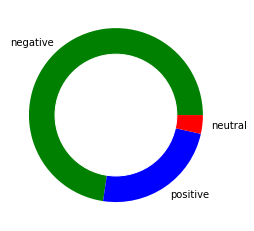

In [22]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

#### Word Clouds

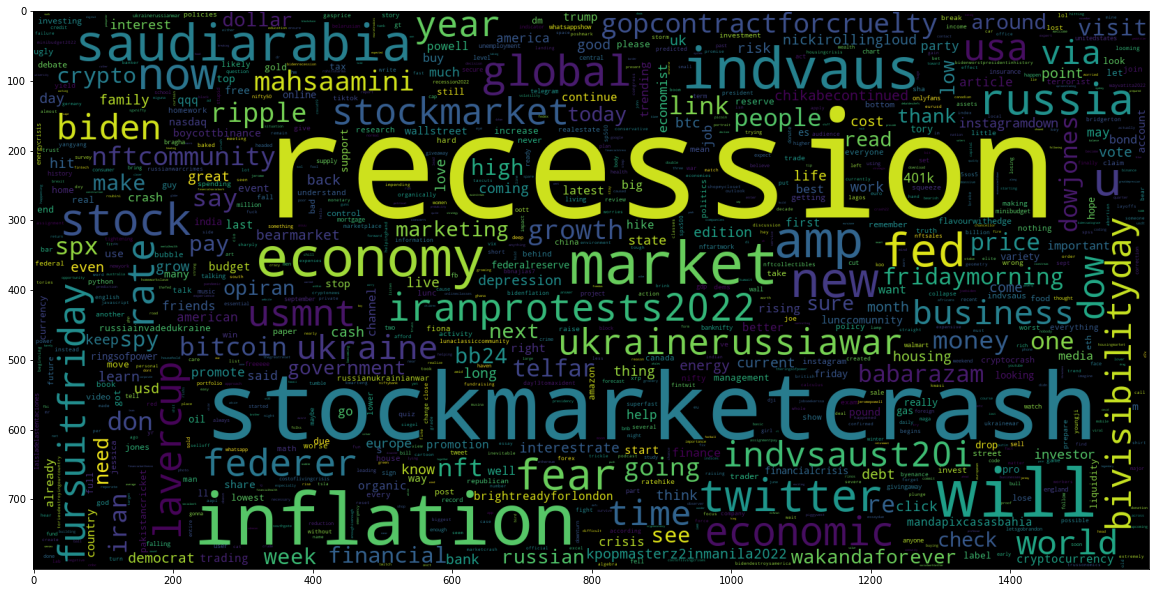

In [23]:
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=True)
plt.figure(figsize = (20,20))
wc = word_cloud.generate(" ".join(tweet_list_df['cleaned']))
plt.imshow(wc)

#### Text Insights

In [24]:
#Calculating tweet's lenght and word count
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [25]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,156.44
neutral,178.09
positive,184.95


In [26]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,23.10
neutral,27.18
positive,27.09


### Saving Output Tweets File to Drive

In [28]:
tweet_list_df.to_csv("C:/Users/Lenovo/Desktop/Twitter/c2_sentimentanalysis_output1.csv", sep=',', encoding='UTF-8')


In [ ]:
tweet_list_df.shape